# Exploratory Data Analysis - Fraud Data

This notebook covers the univariate and bivariate analysis of the e-commerce fraud dataset.

In [1]:
import sys
sys.path.append('../src')
from preprocessing import load_data, clean_data, map_ip_to_country
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 1. Data Loading and Merging

In [2]:
fraud_df, ip_df = load_data('../data/raw/Fraud_Data.csv', '../data/raw/IpAddress_to_Country.csv')
fraud_df = clean_data(fraud_df)
df = map_ip_to_country(fraud_df, ip_df)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,Unknown
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,Unknown
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,Unknown
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,Unknown
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,Unknown


## 2. Univariate Analysis

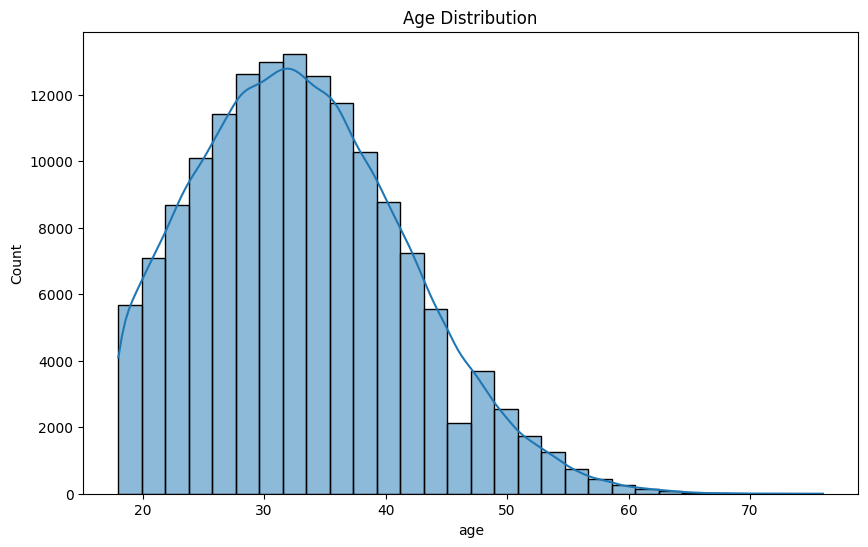

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

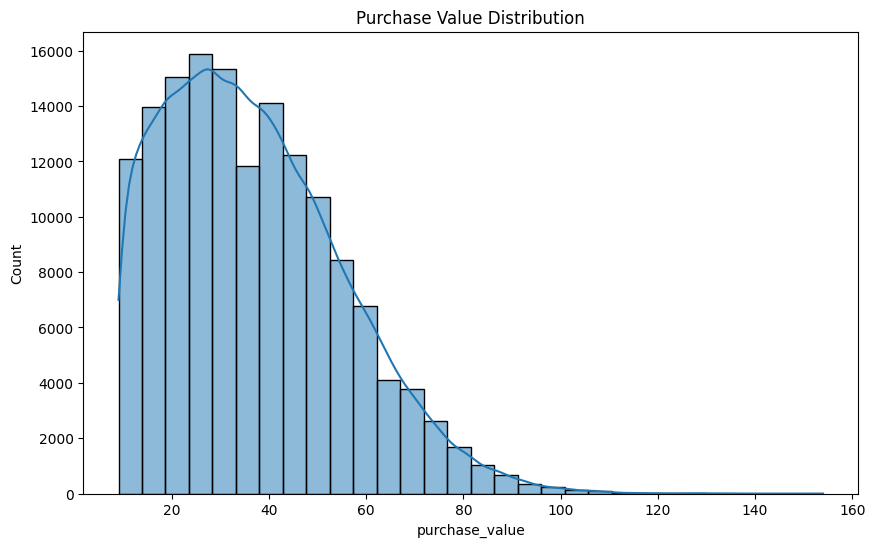

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_value'], bins=30, kde=True)
plt.title('Purchase Value Distribution')
plt.show()

## 3. Class Distribution

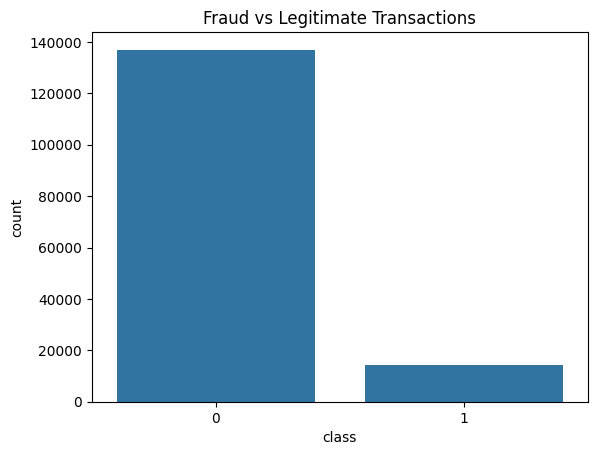

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [5]:
sns.countplot(x='class', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.show()
print(df['class'].value_counts(normalize=True))

## 4. Fraud by Country

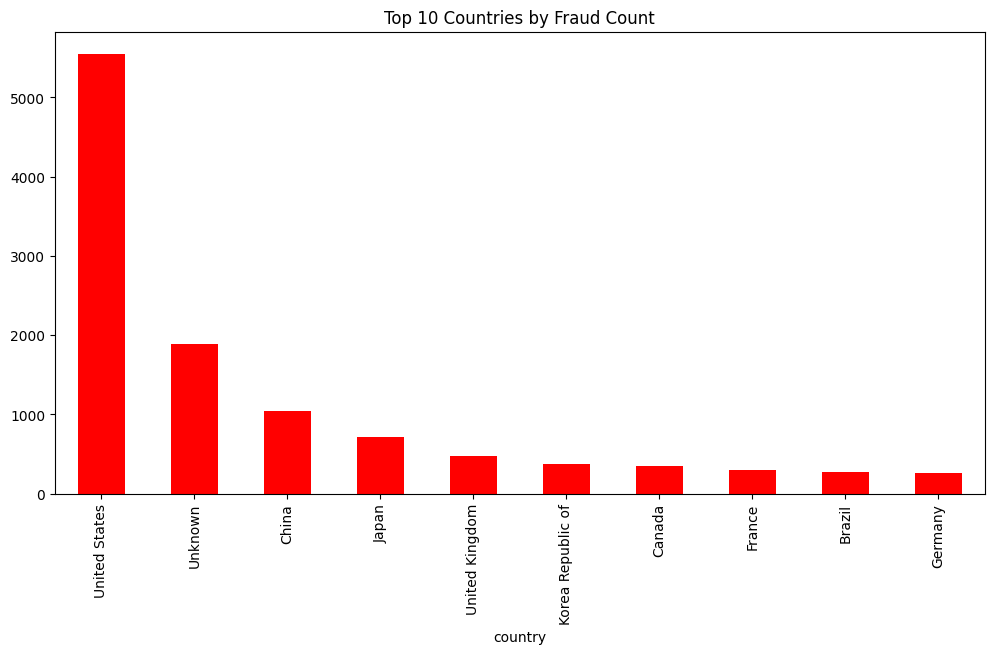

In [6]:
fraud_by_country = df[df['class'] == 1]['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
fraud_by_country.plot(kind='bar', color='red')
plt.title('Top 10 Countries by Fraud Count')
plt.show()